# Analysing Political Executives with AI

## Using AutoGluon to processing the data


```shell
# Link for how to install autogluon on Windows system
# https://auto.gluon.ai/stable/index.html
# For other operation systems, please also check this link for latest news. 

# test automl model
# install autogluon
!pip3 install -U pip
!pip3 install -U setuptools wheel

# CPU version of pytorch has smaller footprint - see installation instructions in
# pytorch documentation - https://pytorch.org/get-started/locally/
!pip3 install torch==1.10.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

!pip3 install autogluon
```

In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split #splitting the dataset
import numpy as np
from ML_figures.figures import act_pred

# Showing all the details of results
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
# Import the data file
train_data = TabularDataset('./../Data/data_AutoGluon_final.csv')

type(train_data)

train_data.columns

train_data.describe()

autogluon.core.dataset.TabularDataset

Index(['ccode', 'leader', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'numentry', 'numexit',
       'yrbegin', 'yrend', 'pop_x', 'begin_gdppc', 'pop_y', 'age', 'tenure',
       'growth_rate', 'fties_range', 'growth_rate_normgroup',
       'growth_rate_avggrp'],
      dtype='object')

,ccode,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,numentry,...,yrend,pop_x,begin_gdppc,pop_y,age,tenure,growth_rate,fties_range,growth_rate_normgroup,growth_rate_avggrp
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1418.000000,1445.000000,1414.000000,1445.000000,1445.000000,1445.000000,1445.0,1445.000000,1445.000000
mean,0.394305,0.089965,0.119723,0.360158,0.062111,0.505450,0.511765,0.551011,0.706401,0.089965,...,0.624434,0.027747,0.047450,0.026582,0.539471,0.070432,0.020987,1.0,3.960554,5.245675
std,0.281553,0.204358,0.249668,0.195221,0.148254,0.245331,0.075815,0.214021,0.418447,0.204358,...,0.263215,0.090014,0.064269,0.085879,0.145988,0.098445,0.069253,0.0,0.537224,0.578819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.314587,1.0,1.000000,1.000000
25%,0.164198,0.000000,0.000000,0.285714,0.000000,0.250000,0.500000,0.394286,0.073681,0.000000,...,0.414286,0.002112,0.012078,0.002062,0.436620,0.014027,0.000036,1.0,4.000000,5.000000
50%,0.374074,0.000000,0.000000,0.285714,0.000000,0.625000,0.500000,0.582857,0.975772,0.000000,...,0.657143,0.005827,0.024310,0.005585,0.535211,0.038301,0.017473,1.0,4.000000,5.000000
75%,0.533333,0.000000,0.166667,0.285714,0.000000,0.625000,0.500000,0.725714,0.988384,0.000000,...,0.850000,0.023118,0.053141,0.021469,0.633803,0.089151,0.038393,1.0,4.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.794453,1.0,7.000000,7.000000


## Three difference cases

In [3]:
# delete other irrelevant columns
del train_data['growth_rate_normgroup']
# del train_data['growth_rate_avggrp']
del train_data['growth_rate']
train_data.columns

# change label into growth_rate
# id, label = 'leader', 'growth_rate'

# change label into growth_rate_normgroup
# id, label = 'leader', 'growth_rate_normgroup'

# change label into growth_rate_avggrp
id, label = 'leader', 'growth_rate_avggrp'
df_train = train_data
df_train.dtypes

Index(['ccode', 'leader', 'entry', 'exit', 'exitcode', 'prevtimesinoffice',
       'posttenurefate', 'gender', 'yrborn', 'yrdied', 'numentry', 'numexit',
       'yrbegin', 'yrend', 'pop_x', 'begin_gdppc', 'pop_y', 'age', 'tenure',
       'fties_range', 'growth_rate_avggrp'],
      dtype='object')

ccode                 float64
leader                 object
entry                 float64
exit                  float64
exitcode              float64
prevtimesinoffice     float64
posttenurefate        float64
gender                float64
yrborn                float64
yrdied                float64
numentry              float64
numexit               float64
yrbegin               float64
yrend                 float64
pop_x                 float64
begin_gdppc           float64
pop_y                 float64
age                   float64
tenure                float64
fties_range           float64
growth_rate_avggrp      int64
dtype: object

In [51]:
#split train data and test data
# df_train, df_test=train_test_split(train_data, test_size=0.33, random_state=1)
# df_train.shape, df_test.shape

In [6]:
predictor = TabularPredictor(label=label).fit(df_train.drop(columns=[id, 'leader']), presets='high_quality')
# predictor = TabularPredictor(label=label).fit(df_train.drop(columns=[id, 'leader']))

No path specified. Models will be saved in: "AutogluonModels\ag-20230613_085719\"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230613_085719\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    1445
Train Data Columns: 19
Label Column: growth_rate_avggrp
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	7 unique label values:  [5, 6, 7, 4, 3, 2, 1]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 10 examples that 

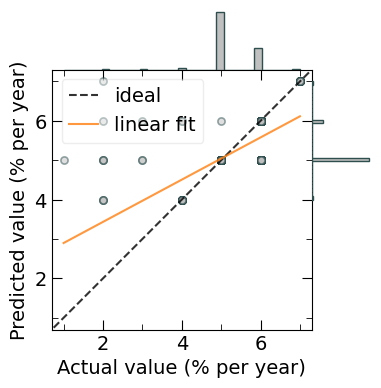

In [7]:
x = df_train[label]
y = predictor.predict(df_train.drop(columns=[label]))

act_pred(x, y, reg_line=True, name = 'ave', save_dir='Images/')

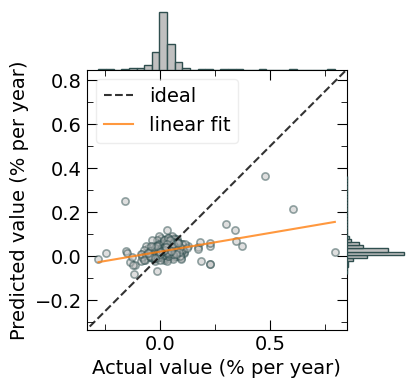

In [53]:
x = df_test[label]
y = predictor.predict(df_test.drop(columns=[label]))

act_pred(x, y, reg_line=True, name = 'line', save_dir='Images/')

In [45]:
predictor.leaderboard(df_train.drop(columns=[id, 'leader']), silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.021663,-0.048322,0.013000,0.005992,0.004010,0.013000,0.005992,0.004010,1,True,2
1,LightGBMLarge,-0.022693,-0.040530,0.002999,0.000998,0.403002,0.002999,0.000998,0.403002,1,True,10
2,ExtraTreesMSE,-0.025833,-0.049619,0.050001,0.022993,0.246993,0.050001,0.022993,0.246993,1,True,7
3,RandomForestMSE,-0.025916,-0.049779,0.061000,0.024000,0.285007,0.061000,0.024000,0.285007,1,True,5
4,XGBoost,-0.030426,-0.046864,0.024999,0.002001,0.194999,0.024999,0.002001,0.194999,1,True,8
5,LightGBM,-0.033139,-0.039266,0.001001,0.001002,0.158999,0.001001,0.001002,0.158999,1,True,4
6,WeightedEnsemble_L2,-0.033422,-0.039116,0.040999,0.012009,2.336052,0.002000,0.000000,0.142998,2,True,11
7,LightGBMXT,-0.036682,-0.039728,0.001998,0.001000,0.136000,0.001998,0.001000,0.136000,1,True,3
8,KNeighborsUnif,-0.037329,-0.046161,0.009000,0.004001,0.003992,0.009000,0.004001,0.003992,1,True,1
9,NeuralNetTorch,-0.039665,-0.040603,0.033001,0.009009,1.495053,0.033001,0.009009,1.495053,1,True,9


In [46]:
predictor.feature_importance(df_train, subsample_size=None)

These features in provided data are not utilized by the predictor and will be ignored: ['leader', 'fties_range']
Computing feature importance via permutation shuffling for 18 features using 617 rows with 5 shuffle sets...
	3.33s	= Expected runtime (0.67s per shuffle set)
	1.67s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
yrborn,3.880558e-03,4.482317e-04,0.000021,5,0.004803,2.957642e-03
tenure,2.886489e-03,3.506355e-04,0.000026,5,0.003608,2.164526e-03
begin_gdppc,2.125674e-03,1.666491e-04,0.000004,5,0.002469,1.782541e-03
ccode,1.493684e-03,1.988466e-04,0.000037,5,0.001903,1.084256e-03
pop_x,1.252207e-03,2.288003e-04,0.000128,5,0.001723,7.811037e-04
yrbegin,1.093228e-03,1.130307e-04,0.000014,5,0.001326,8.604965e-04
yrend,8.261043e-04,8.708081e-05,0.000015,5,0.001005,6.468037e-04
age,6.583253e-04,7.244508e-05,0.000017,5,0.000807,5.091599e-04
pop_y,6.502791e-04,8.274202e-05,0.000031,5,0.000821,4.799122e-04
entry,3.985075e-04,1.144998e-04,0.000735,5,0.000634,1.627508e-04


In [47]:
# predictor.evaluate(df_test.drop(columns=[id, 'leader']))